# 1. Perform Exploratory Data Analysis.

    - What can you conclude from methods of central tendency and deviation of the variables?
    
        - A box plot reveals that the Auxillary nodes variable contains outliers.
        - Values for Auxillary nodes are small relative to Age and Year. May need Normalization/standardization.
            
    - Are there any correlated variables?
    
        - The output and heat map indicate that there are not any heavily correlated variables in the original data set.
        - The output and heat map indicate that there are not any heavily correlated variables in data with outliers removed.
        
    - Interpret the skewness of the variables.
    
        - In both the original data set and the one with outliers removed, the is positive skewness in Auxilary nodes and Year.
        

<IPython.core.display.Javascript object>


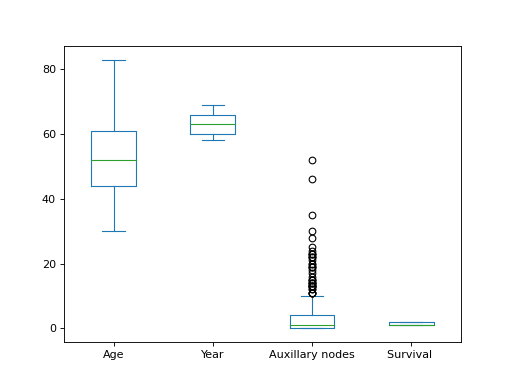

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [1]:
# Box Plot and Summary Statistics to identify outliers

# Import Libraries
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib notebook

data = pd.read_csv('cancer.csv')

data.plot.box()
data.describe()

<IPython.core.display.Javascript object>


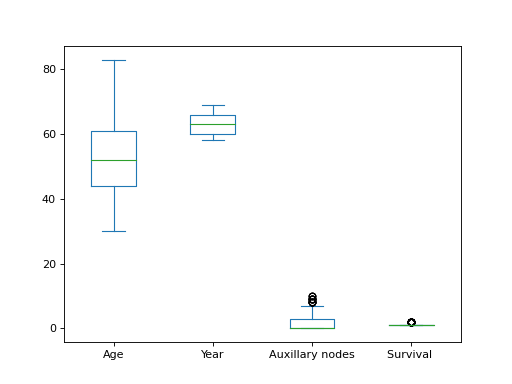

<AxesSubplot:>

In [2]:
# Removing outliers from Auxillary nodes

maximum = 4.0 + 1.5 * (4.0 - 0.0)

data_removed_outliers = data[data['Auxillary nodes'] <= maximum]

data_removed_outliers.plot.box()

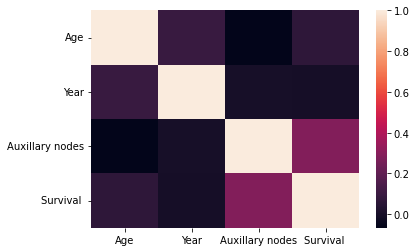

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [3]:
# Correlation and Heat Map on original data set with outliers

%matplotlib inline

data = pd.read_csv('cancer.csv')

corr = data.corr()

sns.heatmap(corr)
plt.show()

corr

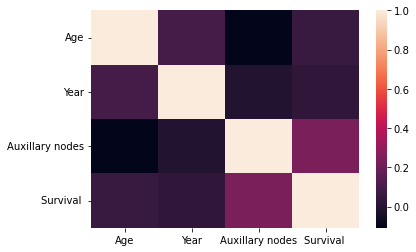

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


In [4]:
# Correlation and Heat Map on modified data set with outliers removed

corr = data_removed_outliers.corr()

sns.heatmap(corr)
plt.show()

corr

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

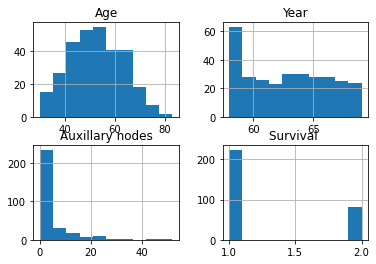

In [5]:
# Skewness of variables on original data set

data.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

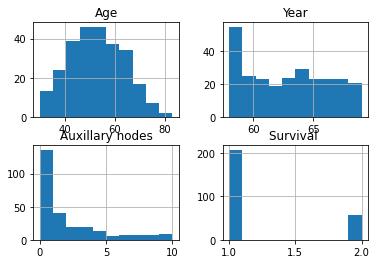

In [6]:
# Skewness of variables with outliers removed

data_removed_outliers.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

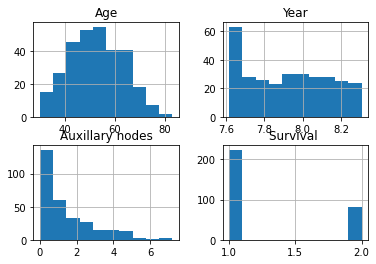

In [7]:
# Remove skewness from origninal data set with outliers

data_removed_skew = data[:]
data_removed_skew['Auxillary nodes'] = data_removed_skew['Auxillary nodes']**(0.5)
data_removed_skew['Year'] = data_removed_skew['Year']**(0.5)

data_removed_skew.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

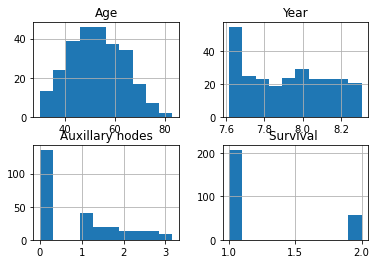

In [8]:
# Remove skewness from data without outliers

data_removed_outliers_and_skew = data_removed_outliers[:]
data_removed_outliers_and_skew['Auxillary nodes'] = data_removed_outliers_and_skew['Auxillary nodes']**(0.5)
data_removed_outliers_and_skew['Year'] = data_removed_outliers_and_skew['Year']**(0.5)

data_removed_outliers_and_skew.hist()

# 2. Develop Supervised Learning Models.

    - Logistic Regression
    - Random Forest
    - Support Vector Machine
    - Neural Network
    
        All models are in function predictionResults
            
            User passes the following paramters
            
                dataset         # The dataset that the funtion runs against
                
                                # Available values:
                  
                                data                               # unmodified data from cancer.csv
                                data_removed_outliers              # data with outliers removed
                                data_removed_skew                  # data with skewness removed
                                data_removed_outliers_and_skew     # data with outliers and skewness remove
                        
                        
                datasetName     # String value for printing in the output and setting best parameters
                            
                                # Available values:
                            
                                'data'
                                'data_removed_outliers'
                                'data_removed_skew'
                                'data_removed_outliers_and_skew'
                            
                            
                rescale         # Indicates whether or not to perform scaling
                
                                # Available values:
                                
                                'normalization'
                                'standardization'
                                
                                # Any other value will ingore scaling
                                
                
                algorithm       # Indicates which algorithm to use
                
                                # Available values:
                                
                                'lr'    # Logistic Regression
                                'nn'    # Neural Network
                                'rf'    # Random Forest
                                'sv'    # Support Vector Machine
                                
                                
                useBestParams   # Boolean value to indicate whether to use default hyper paramaters or GridSearchCV results
                
                                # Available values:
                                
                                False   # Uses values originally set when running each algorithm
                                True    # Uses the values that were output by GridSearchCV.
                                            **These are hardcoded values based on running these specific datasets**
    
    
Compare the 4 methods based on the performance metrics and identify the best model for this problem.

    The best model for this problem is Random Forest.
    
        Random Forest returned the highest AUC of 0.73 for three datasets using the GridSearchCV identified hyper paramaters:
        
            The original dataset with no scaling
        
            The original dataset scaled by standardization
        
            The dataset with skewness removed and scaled by standardization
            
            
        Random Forest for the original dataset (no scaling) is the overall best since it wasn't as overfitted as the other two.
    

    - Use 10 - fold cross validation.
    
        Cross validation is built into the predictionResults function
        
        
    - Use GridSearchCV for searching through hyper parameters.

        GridSearchCV is built into the predictionResults function
        

# Function predictionResults. Used for Question 2.

In [9]:
# Function that receives input parameters of data set, data set name, whether or not to standardize/normalize, which algorithm to use, and whether to use default hyper parameters or those that came from GridSearchCV.

def predictionResults(dataset, datasetName, rescale, algorithm, useBestParams):
    
    X = dataset.drop(columns = ['Survival '])
    y = dataset['Survival ']
    
    rescale = rescale.lower()
    
    if rescale in ['standardization', 'normalization']:
        
        if rescale == 'standardization':
            scaler = StandardScaler()
        elif rescale == 'normalization':
            scaler = MinMaxScaler()
            
        scaler.fit(X)
        scaled = scaler.fit_transform(X)
        
        X = pd.DataFrame(scaled, columns = X.columns)
        
    else:
        
        rescale = 'none'
        
        
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    
    algorithm = algorithm.lower()
    
    if algorithm in ('lr', 'rf', 'sv', 'nn'):
        
        if algorithm == 'lr':
            
            fitInt = True
            multClass = 'auto'
            pnlty = 'none'
            rndState = 10
            slvr = 'lbfgs'
                
            if useBestParams == True:
                slvr = 'sag'
                rndState = None
            
                if datasetName in ('data', 'data_removed_skew') and rescale == 'none':
                    rndState = 1
                elif datasetName == 'data_removed_outliers' and rescale == 'none':
                    rndState = 1
                    slvr = 'saga'
                elif datasetName in ('data', 'data_removed_outliers', 'data_removed_outliers_and_skew') and rescale in ('normalization', 'standardization'):
                    rndState = 1
                    slvr = 'lbfgs'
                elif datasetName == 'data_removed_outliers':
                    rndState = 1
                elif datasetName == 'data_removed_skew' and rescale in ('normalization', 'standardization'):
                    rndState = 1
                    slvr = 'lbfgs'
                elif datasetName == 'data_removed_outliers_and_skew' and rescale == 'none':
                    fitInt = False
                    rndState = 1
                    slvr = 'lbfgs'
                    
            print('Parameters: fit_intercept: ' + str(fitInt) + ', multi_class: ' + multClass + ', penalty: ' + pnlty + ', random_state: ' + str(rndState) + ', solver: ' + slvr)
            
            clf = LogisticRegression(fit_intercept = fitInt, multi_class = multClass, random_state = rndState, penalty = pnlty, solver = slvr).fit(X_train, y_train)
            algorithmName = 'Logistic Regression'
            parameters = {'solver': ('lbfgs', 'newton-cg', 'sag', 'saga'), 'fit_intercept': (True, False), 'multi_class': ('auto', 'ovr', 'multinomial'), 'random_state': [1, 10]}
            
        elif algorithm == 'rf':
            
            crit = 'gini'
            nest = 50
            maxDepth = 5
            maxFeat = 'sqrt'
            rndState = 0
            
            if useBestParams == True:
                crit = 'entropy'
                maxFeat = 'auto'
                nest = 100
            
                if datasetName == 'data_removed_skew' or (datasetName == 'data' and rescale == 'normalization'):
                    nest = 80
                elif datasetName in ('data_removed_outliers', 'data_removed_outliers_and_skew') and rescale == 'standardization':
                    nest = 60
                elif datasetName == 'data' and rescale == 'none':
                    nest = 90
                elif datasetName == 'data' and rescale == 'standardization':
                    nest = 70
                    
            print('Parameters: criterion: ' + crit + ', max_depth: ' + str(maxDepth) + ', max_features: ' + maxFeat + ', n_estimators: ' + str(nest) + ', random_state: ' + str(rndState))
            
            clf = RandomForestClassifier(criterion = crit, n_estimators = nest, max_depth = maxDepth, max_features = maxFeat, random_state = rndState).fit(X_train, y_train)
            algorithmName = 'Random Forest'
            parameters = {'n_estimators': (50, 60, 70, 80, 90, 100), 'criterion': ('gini', 'entropy'), 'max_features': ('auto', 'sqrt', 'log2')}
            
        elif algorithm == 'sv':
            
            gam = 1
            krnl = 'rbf'
            reg = 1
            rndState = 0
            
            if useBestParams == True:
                krnl = 'linear'
                
                if datasetName == 'data_removed_outliers_and_skew' and rescale == 'none':
                    krnl = 'rbf'
                if datasetName == 'data' and rescale == 'normalization':
                    reg = 10
                if datasetName == 'data_removed_skew' and rescale in ('normalization', 'standardization'):
                    reg = 10
                    
            print('Parameters: C: ' + str(reg) + ', gamma: ' + str(gam) + ', kernel: ' + krnl + ', random_state: ' + str(rndState))
            
            clf = SVC(gamma = gam, kernel = krnl, C = reg, random_state = rndState).fit(X_train, y_train)
            algorithmName = 'Support Vector Machine'
            parameters = {'kernel': ('linear', 'rbf', 'sigmoid'), 'C': [1, 10], 'random_state': (0, 1)}
            
        else:
            
            act = 'relu'
            alph = 0.0001
            hidLayerSize = (5,)
            learnRate = 0.01
            maxIter = 10000
            rndState = 1
            slvr = 'lbfgs'
            
            if useBestParams == True:
                act = 'logistic'
                slvr = 'adam'
                
                if datasetName in ('data', 'data_removed_outliers_and_skew') and rescale == 'standardization':
                    act = 'tanh'
                    slvr = 'sgd'
                elif datasetName == 'data' and rescale == 'normalization':
                    act = 'relu'
                    slvr = 'lbfgs'
                elif datasetName == 'data_removed_outliers' and rescale == 'normalization':
                    act = 'relu'
                    alph = 0.01
                    slvr = 'lbfgs'
                elif datasetName in ('data_removed_skew', 'data_removed_outliers_and_skew') and rescale == 'none':
                    act = 'identity'
                elif datasetName == 'data_removed_skew' and rescale == 'standardization':
                    act = 'identity'
                    slvr = 'sgd'
                elif datasetName == 'data_removed_skew' and rescale == 'normalization':
                    act = 'relu'
                
            print('Parameters: activation: ' + act + ', alpha: ' + str(alph) + ', hidden_layer_sizes: ' + str(hidLayerSize) + ', learning_rate_init: ' + str(learnRate) + ', max_iter: ' + str(maxIter) + ', random_state: ' + str(rndState) + ', solver: ' + slvr)
            
            clf = MLPClassifier(max_iter = maxIter, solver = slvr, alpha = alph, hidden_layer_sizes = hidLayerSize, random_state = rndState, activation = act, learning_rate_init = learnRate).fit(X_train, y_train)
            algorithmName = 'Neural Network'
            parameters = {'solver': ('adam', 'lbfgs', 'sgd'), 'activation': ('identity', 'logistic', 'relu', 'tanh'), 'alpha': (0.0001, 0.001, 0.01)}
            
            
        print('Data set: ' + datasetName)
        print('Scaler: ' + rescale)
        print('Algorithm: ' + algorithmName + '\n')
        
        
        clf.score(X_test, y_test)
        
        y_pred = clf.predict(X_test)

        labels = ['Survived', 'Died']

        cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
        disp.plot()

        print(classification_report(y_test, y_pred, labels = clf.classes_))

        plot_roc_curve(clf, X_test, y_test)
        plt.show()
        
        kf = KFold(n_splits = 10)
        
        accuracy = []
        iteration = 1
        for train_indices, test_indices in kf.split(X_train):
            clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
            print("Accuracy for iteration " + str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
            accuracy.append(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))
            iteration += 1
            
        print('\n' + "Average Accuracy is: " + str(statistics.mean(accuracy)) + '\n')
        
        clf_grid = GridSearchCV(clf, parameters)
        clf_grid.fit(X_train, y_train)
        gridSearchResult = clf_grid.best_params_
        
        print(gridSearchResult)
        
    else:
        
        print('Please enter a valid algorithm: LR, RF, SV, NN')
    

# All the possible variations of parameter values for Question # 2.

***Uncomment out whichever line you want to run and comment out all other lines.****

    paramaters are:
    dataset, datasetName, rescale, algorithm, and useBestParams

    useBestParams is always set to True in the below examples. 
        **The Best Hyper Parameters are hardcoded values based on running these specific datasets**
        Replace True value with False to use the values originally set when running each algorithm
        

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 70, random_state: 0
Data set: data
Scaler: standardization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.85      0.89      0.87        97
           2       0.48      0.40      0.43        25

    accuracy                           0.79       122
   macro avg       0.66      0.64      0.65       122
weighted avg       0.77      0.79      0.78       122



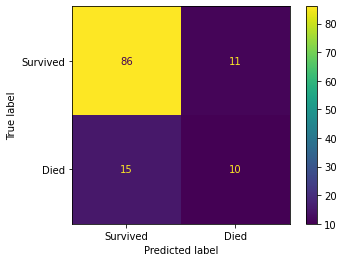

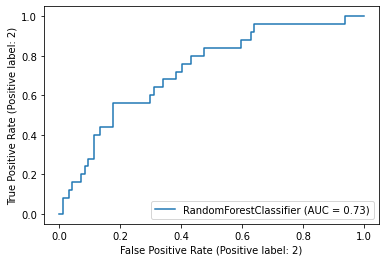

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6111111111111112
Accuracy for iteration 10 is 0.8333333333333334

Average Accuracy is: 0.7005847953216374

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 70}


In [10]:

# LR

# predictionResults(data, 'data', '', 'LR', True)
# predictionResults(data, 'data', 'Standardization', 'LR', True)
# predictionResults(data, 'data', 'normalization', 'LR', True)

# predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'LR', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'Standardization', 'LR', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'LR', True)

# predictionResults(data_removed_skew, 'data_removed_skew', '', 'LR', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'Standardization', 'LR', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'LR', True)

# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'LR', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'Standardization', 'LR', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'LR', True)

    
# RF
    
# predictionResults(data, 'data', '', 'RF', True)
predictionResults(data, 'data', 'Standardization', 'RF', True)
# predictionResults(data, 'data', 'normalization', 'RF', True)

# predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'RF', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'Standardization', 'RF', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'RF', True)

# predictionResults(data_removed_skew, 'data_removed_skew', '', 'RF', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'Standardization', 'RF', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'RF', True)

# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'RF', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'Standardization', 'RF', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'RF', True)

    
# SV
    
# predictionResults(data, 'data', '', 'SV', True)
# predictionResults(data, 'data', 'Standardization', 'SV', True)
# predictionResults(data, 'data', 'normalization', 'SV', True)

# predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'SV', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'Standardization', 'SV', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'SV', True)

# predictionResults(data_removed_skew, 'data_removed_skew', '', 'SV', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'Standardization', 'SV', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'SV', True)

# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'SV', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'Standardization', 'SV', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'SV', True)

    
# NN
        
# predictionResults(data, 'data', '', 'NN', True)
# predictionResults(data, 'data', 'Standardization', 'NN', True)
# predictionResults(data, 'data', 'normalization', 'NN', True)

# predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'NN', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'Standardization', 'NN', True)
# predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'NN', True)

# predictionResults(data_removed_skew, 'data_removed_skew', '', 'NN', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'Standardization', 'NN', True)
# predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'NN', True)

# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'NN', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'Standardization', 'NN', True)
# predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'NN', True)


# Question 3. Evaluate if the algorithms are overfitting?

****All variations of parameter values for Question 2 are run at the bottom. Accuracy and average accuracy on k-fold cross
    validation were taken from that output.****
    
    
    There is some overfitting in the algorithms.
    
        The best model based on AUC was Random Forest 
        
            Unmodified data, data with standardization, and data with standardization and skewness removed all had 0.73 AUC.
            
            The unmodified data had an accuracy of 0.76 but only an average accuracy of 0.71 on the k-fold cross validation.
            
            The other two had accuracies of 0.79 but only average accuracies of 0.70 on the k-fold cross validation.
            
            The unmodified data had a 6.39% decrease (5 percent point drop).
            
            The other two had an 11% decrease (9 percent point drop), which was the largest decrease seen.
        
        
        The closest model was Neural Network, Normalized, with skewness removed.
        
            It had an accuracy of 0.76 with an average accuracy of 0.755 on the k-fold cross validation.
            
            This 0.7% decrease (0.5 percent point drop) would not be considered overfitting.
            
        
        
        Logistic Regression
        
            Unmodified data: overfitting of 5.35%
            
            Data with outliers removed: cross validation yielded better accuracy
            
            Data with skewness removed: slight overfitting, if it could be considered that at around 2%
            
            Data with outliers and skewness removed: cross validation yielded better accuracy
            
            
        Random Forest
        
            Unmodified data: overfitting of around 8.7% (from 6.39% to 11.32% depending on scaling)
            
            Data with outliers removed: cross validation yielded better accuracy
            
            Data with skewness removed: overfitting of around 10% (from 9.47% to 11.32% depending on scaling)
            
            Data with outliers and skewness removed: cross validation yielded better accuracy
            

        Support Vector Machine
        
            Unmodified data: overfitting of around 4.8% (from 4.12% to 6.21% depending on scaling)
            
            Data with outliers removed: cross validation yielded better accuracy
            
            Data with skewness removed: slight overfitting of around 3.7% (from 3.47% to 4.19% depending on scaling)
            
            Data with outliers and skewness removed: cross validation yielded better accuracy


        Neural Network
        
            Unmodified data: slight overfitting of around 3.85% (from 1.23% to 5.31% depending on scaling)
            
            Data with outliers removed: cross validation yielded better accuracy
            
            Data with skewness removed: slight overfitting of around 2.68% (from 0.7% to 4% depending on scaling)
            
            Data with outliers and skewness removed: cross validation yielded better accuracy


# Question 4. Develop a function which can implement machine learning.

    def machine_learning(data, algorithm):
        ...
        ...
        plot ROC curve
        return performance metrics
        
    Function call: machine_learning(data, neural_network)
    
    Parameters
    
        data        # The dataset that the funtion runs against
                
                    # Available values:
                  
                    data                               # unmodified data from cancer.csv
                    data_removed_outliers              # data with outliers removed
                    data_removed_skew                  # data with skewness removed
                    data_removed_outliers_and_skew     # data with outliers and skewness remove
                    
                    
        algorithm   # Indicates which algorithm to use
        
                    # Available values:
                    
                    'logistic_regression'
                    'random_forest'
                    'support_vector_machine'
                    'neural_network'
                    

# Function machine_learning. Used for Question 4.

In [11]:
# Function that receives input parameters of data and algorithm.

def machine_learning(data, algorithm):
    
    dataset = data[:]
    X = dataset.drop(columns = ['Survival '])
    y = dataset['Survival ']
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    
    algorithm = algorithm.lower()
    
    if algorithm in ('logistic_regression', 'random_forest', 'support_vector_machine', 'neural_network'):
        
        if algorithm == 'logistic_regression':
            
            fitInt = True
            multClass = 'auto'
            pnlty = 'none'
            rndState = 10
            slvr = 'lbfgs'
                    
            print('Parameters: fit_intercept: ' + str(fitInt) + ', multi_class: ' + multClass + ', penalty: ' + pnlty + ', random_state: ' + str(rndState) + ', solver: ' + slvr)
            
            clf = LogisticRegression(fit_intercept = fitInt, multi_class = multClass, random_state = rndState, penalty = pnlty, solver = slvr).fit(X_train, y_train)
            algorithmName = 'Logistic Regression'

        elif algorithm == 'random_forest':
            
            crit = 'gini'
            nest = 50
            maxDepth = 5
            maxFeat = 'sqrt'
            rndState = 0
            
            print('Parameters: criterion: ' + crit + ', max_depth: ' + str(maxDepth) + ', max_features: ' + maxFeat + ', n_estimators: ' + str(nest) + ', random_state: ' + str(rndState))
            
            clf = RandomForestClassifier(criterion = crit, n_estimators = nest, max_depth = maxDepth, max_features = maxFeat, random_state = rndState).fit(X_train, y_train)
            algorithmName = 'Random Forest'

        elif algorithm == 'support_vector_machine':
            
            gam = 1
            krnl = 'rbf'
            reg = 1
            rndState = 0
                    
            print('Parameters: C: ' + str(reg) + ', gamma: ' + str(gam) + ', kernel: ' + krnl + ', random_state: ' + str(rndState))
            
            clf = SVC(gamma = gam, kernel = krnl, C = reg, random_state = rndState).fit(X_train, y_train)
            algorithmName = 'Support Vector Machine'

        else:
            
            act = 'relu'
            alph = 0.0001
            hidLayerSize = (5,)
            learnRate = 0.01
            maxIter = 10000
            rndState = 1
            slvr = 'lbfgs'
                
            print('Parameters: activation: ' + act + ', alpha: ' + str(alph) + ', hidden_layer_sizes: ' + str(hidLayerSize) + ', learning_rate_init: ' + str(learnRate) + ', max_iter: ' + str(maxIter) + ', random_state: ' + str(rndState) + ', solver: ' + slvr)
            
            clf = MLPClassifier(max_iter = maxIter, solver = slvr, alpha = alph, hidden_layer_sizes = hidLayerSize, random_state = rndState, activation = act, learning_rate_init = learnRate).fit(X_train, y_train)
            algorithmName = 'Neural Network'
            
            
        print('Algorithm: ' + algorithm + '\n')
        
        
        clf.score(X_test, y_test)
        
        y_pred = clf.predict(X_test)

        labels = ['Survived', 'Died']

        cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
        disp.plot()

        print(classification_report(y_test, y_pred, labels = clf.classes_))

        plot_roc_curve(clf, X_test, y_test)
        plt.show()
        
    else:
        print('Please enter a valid algorithm: logistic_regression, random_forest, support_vector_machine, neural_network')
    

# Call function machine_learning with the following parameters for Question 4.

    data        The dataset that the funtion runs against
                
                Available values:
   
                data                               unmodified data from cancer.csv
                data_removed_outliers              data with outliers removed
                data_removed_skew                  data with skewness removed
                data_removed_outliers_and_skew     data with outliers and skewness remove


    algorithm   Indicates which algorithm to use
        
                Available values:
                    
                'logistic_regression'
                'random_forest'
                'support_vector_machine'
                'neural_network'


Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 10, solver: lbfgs
Algorithm: logistic_regression

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        97
           2       0.42      0.20      0.27        25

    accuracy                           0.78       122
   macro avg       0.62      0.56      0.57       122
weighted avg       0.74      0.78      0.75       122



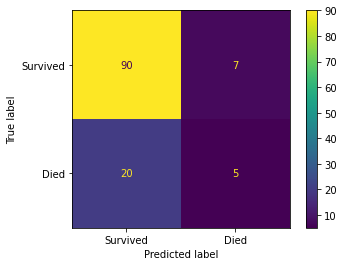

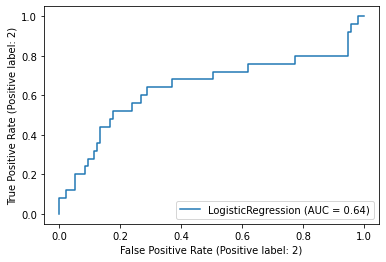

In [12]:
machine_learning(data, 'logistic_regression')

# Below are the results for every combination of parameters for Question 2.

    - These have all been run with the useBestParams set to True
        **The Best Hyper Parameters are hardcoded values based on running these specific datasets**
        Replace True value with False to use the values originally set when running each algorithm

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: sag
Data set: data
Scaler: none
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        97
           2       0.42      0.20      0.27        25

    accuracy                           0.78       122
   macro avg       0.62      0.56      0.57       122
weighted avg       0.74      0.78      0.75       122



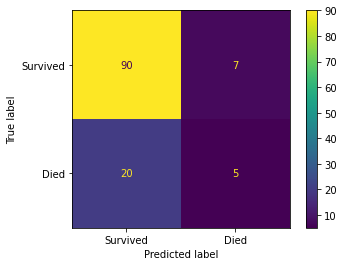

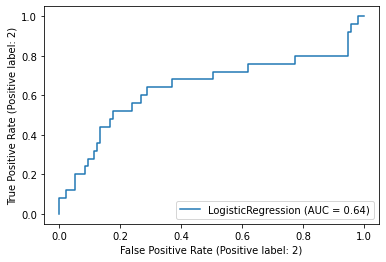

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'sag'}


In [13]:
predictionResults(data, 'data', '', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data
Scaler: standardization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        97
           2       0.42      0.20      0.27        25

    accuracy                           0.78       122
   macro avg       0.62      0.56      0.57       122
weighted avg       0.74      0.78      0.75       122



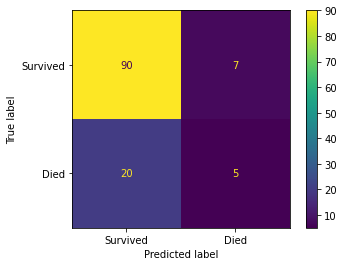

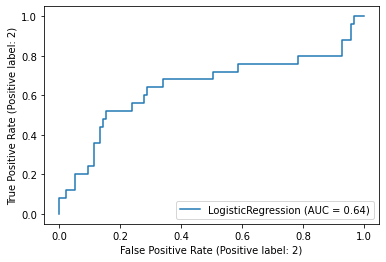

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [14]:
predictionResults(data, 'data', 'standardization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data
Scaler: normalization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.82      0.93      0.87        97
           2       0.42      0.20      0.27        25

    accuracy                           0.78       122
   macro avg       0.62      0.56      0.57       122
weighted avg       0.74      0.78      0.75       122



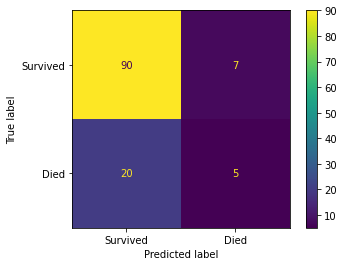

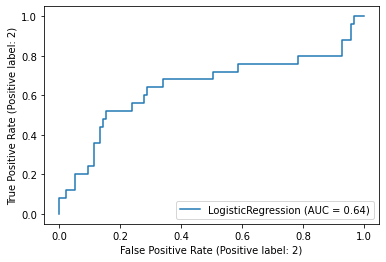

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [15]:
predictionResults(data, 'data', 'normalization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: saga
Data set: data_removed_outliers
Scaler: none
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        78
           2       1.00      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.88      0.54      0.50       106
weighted avg       0.82      0.75      0.67       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


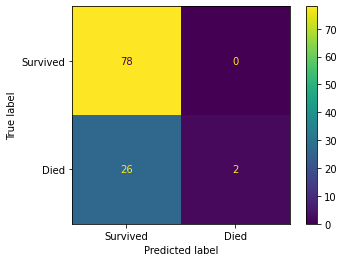

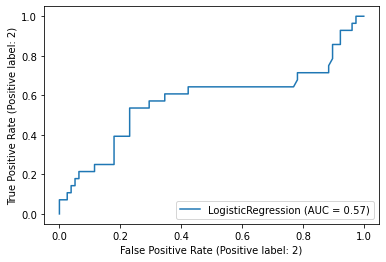

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7983333333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'saga'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [16]:
predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_outliers
Scaler: standardization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.74      0.97      0.84        78
           2       0.33      0.04      0.06        28

    accuracy                           0.73       106
   macro avg       0.54      0.51      0.45       106
weighted avg       0.63      0.73      0.63       106



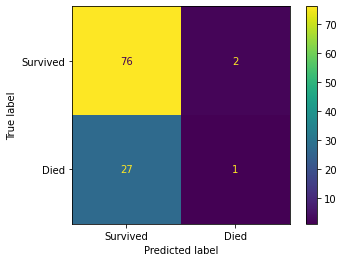

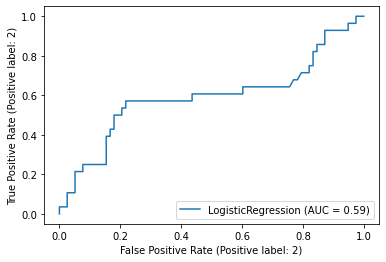

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [17]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'standardization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_outliers
Scaler: normalization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.74      0.97      0.84        78
           2       0.33      0.04      0.06        28

    accuracy                           0.73       106
   macro avg       0.54      0.51      0.45       106
weighted avg       0.63      0.73      0.63       106



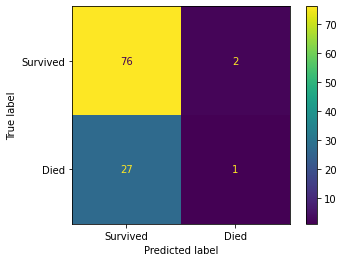

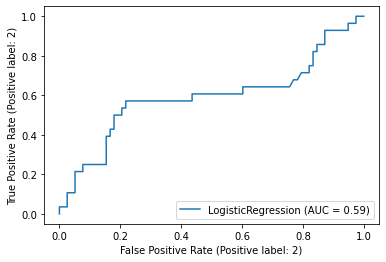

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [18]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: sag
Data set: data_removed_skew
Scaler: none
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


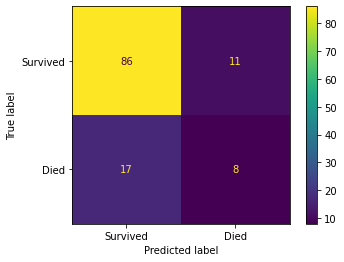

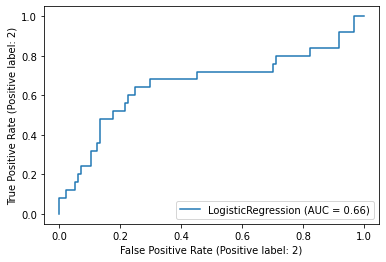

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7599415204678363



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'sag'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [19]:
predictionResults(data_removed_skew, 'data_removed_skew', '', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_skew
Scaler: standardization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



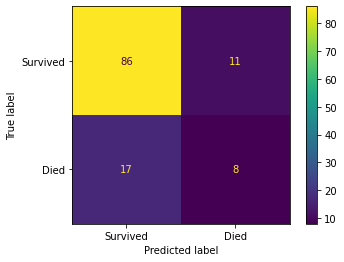

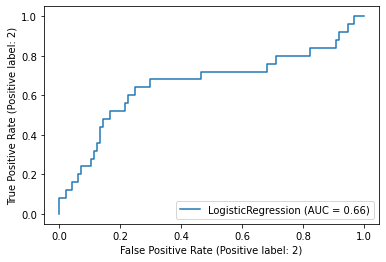

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7543859649122807

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [20]:
predictionResults(data_removed_skew, 'data_removed_skew', 'standardization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_skew
Scaler: normalization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



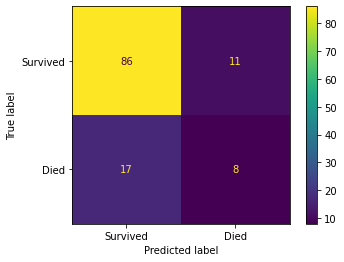

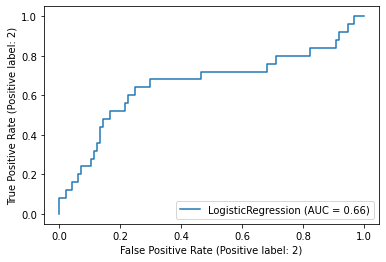

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7543859649122807

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [21]:
predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'LR', True)

Parameters: fit_intercept: False, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_outliers_and_skew
Scaler: none
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.99      0.85        78
           2       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



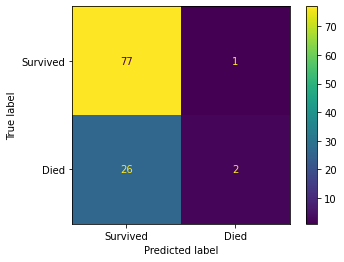

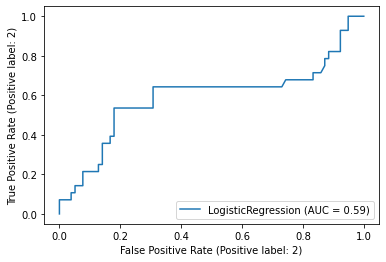

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8045833333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'fit_intercept': False, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [22]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_outliers_and_skew
Scaler: standardization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.99      0.85        78
           2       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



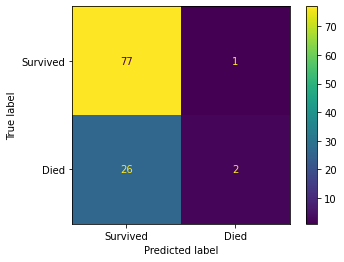

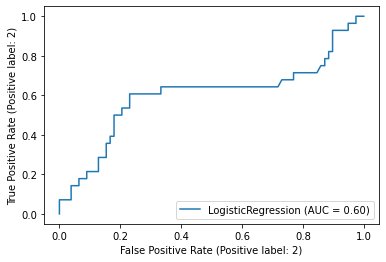

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.6875
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8045833333333333

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [23]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'standardization', 'LR', True)

Parameters: fit_intercept: True, multi_class: auto, penalty: none, random_state: 1, solver: lbfgs
Data set: data_removed_outliers_and_skew
Scaler: normalization
Algorithm: Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.99      0.85        78
           2       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



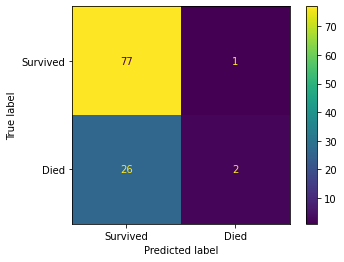

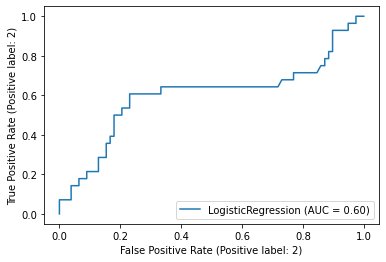

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.6875
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8045833333333333

{'fit_intercept': True, 'multi_class': 'auto', 'random_state': 1, 'solver': 'lbfgs'}


In [24]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'LR', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 90, random_state: 0
Data set: data
Scaler: none
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.39      0.28      0.33        25

    accuracy                           0.76       122
   macro avg       0.61      0.58      0.59       122
weighted avg       0.74      0.76      0.75       122



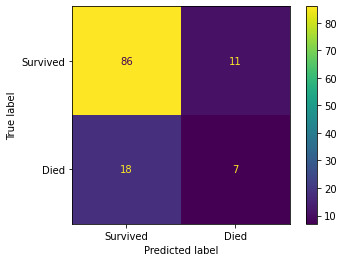

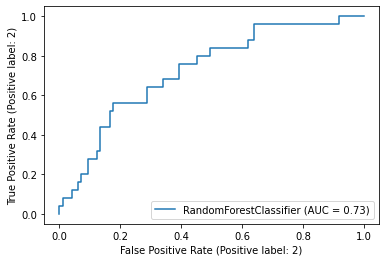

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5789473684210527
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.8333333333333334

Average Accuracy is: 0.7114035087719298

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 90}


In [25]:
predictionResults(data, 'data', '', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 70, random_state: 0
Data set: data
Scaler: standardization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.85      0.89      0.87        97
           2       0.48      0.40      0.43        25

    accuracy                           0.79       122
   macro avg       0.66      0.64      0.65       122
weighted avg       0.77      0.79      0.78       122



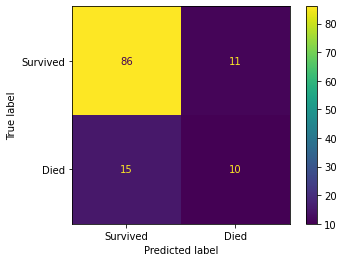

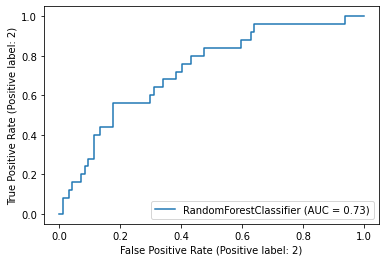

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6111111111111112
Accuracy for iteration 10 is 0.8333333333333334

Average Accuracy is: 0.7005847953216374

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 70}


In [26]:
predictionResults(data, 'data', 'standardization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 80, random_state: 0
Data set: data
Scaler: normalization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



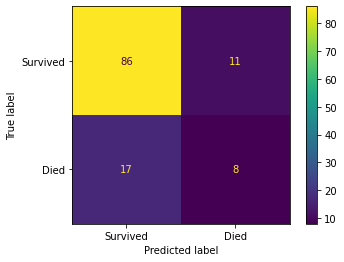

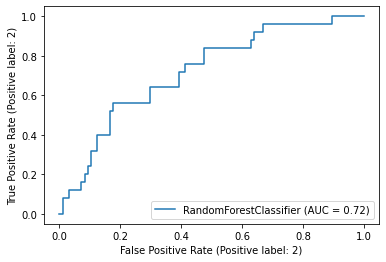

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.8333333333333334

Average Accuracy is: 0.706140350877193

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 80}


In [27]:
predictionResults(data, 'data', 'normalization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 100, random_state: 0
Data set: data_removed_outliers
Scaler: none
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.75      0.97      0.85        78
           2       0.60      0.11      0.18        28

    accuracy                           0.75       106
   macro avg       0.68      0.54      0.52       106
weighted avg       0.71      0.75      0.67       106



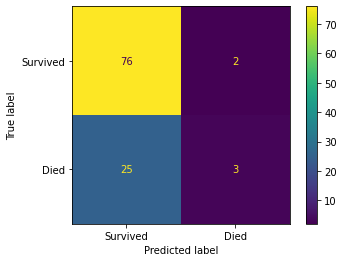

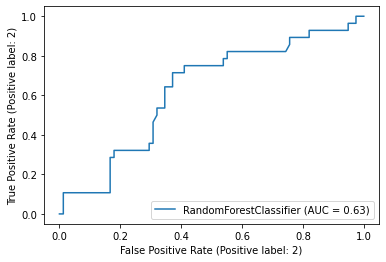

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [28]:
predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 60, random_state: 0
Data set: data_removed_outliers
Scaler: standardization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.74      0.95      0.83        78
           2       0.33      0.07      0.12        28

    accuracy                           0.72       106
   macro avg       0.54      0.51      0.47       106
weighted avg       0.63      0.72      0.64       106



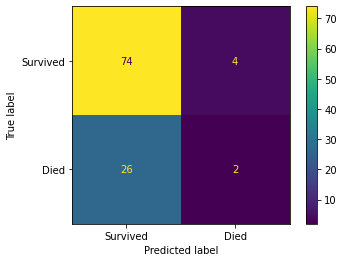

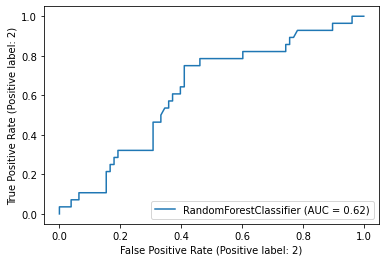

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 60}


In [29]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'standardization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 100, random_state: 0
Data set: data_removed_outliers
Scaler: normalization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.75      0.97      0.85        78
           2       0.60      0.11      0.18        28

    accuracy                           0.75       106
   macro avg       0.68      0.54      0.52       106
weighted avg       0.71      0.75      0.67       106



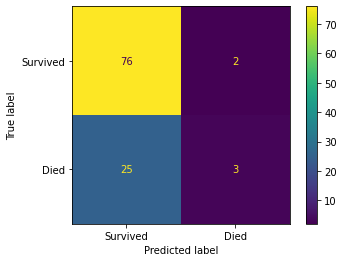

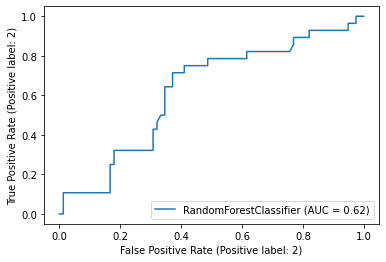

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [30]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 80, random_state: 0
Data set: data_removed_skew
Scaler: none
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.84      0.89      0.86        97
           2       0.45      0.36      0.40        25

    accuracy                           0.78       122
   macro avg       0.65      0.62      0.63       122
weighted avg       0.76      0.78      0.77       122



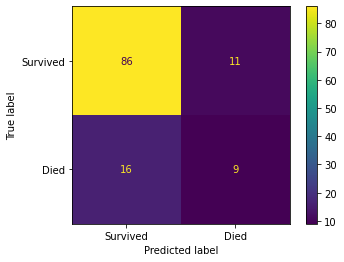

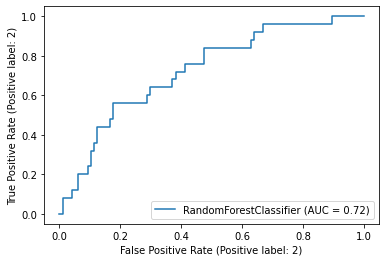

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7777777777777778

Average Accuracy is: 0.7005847953216374

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 80}


In [31]:
predictionResults(data_removed_skew, 'data_removed_skew', '', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 80, random_state: 0
Data set: data_removed_skew
Scaler: standardization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.85      0.89      0.87        97
           2       0.48      0.40      0.43        25

    accuracy                           0.79       122
   macro avg       0.66      0.64      0.65       122
weighted avg       0.77      0.79      0.78       122



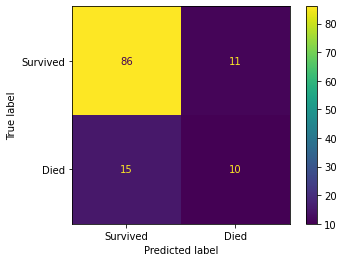

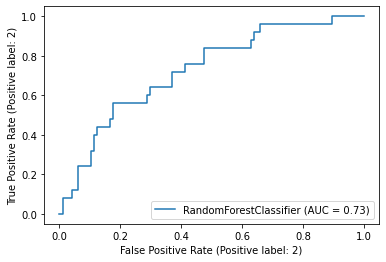

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7777777777777778

Average Accuracy is: 0.7005847953216374

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 80}


In [32]:
predictionResults(data_removed_skew, 'data_removed_skew', 'standardization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 80, random_state: 0
Data set: data_removed_skew
Scaler: normalization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.84      0.89      0.86        97
           2       0.45      0.36      0.40        25

    accuracy                           0.78       122
   macro avg       0.65      0.62      0.63       122
weighted avg       0.76      0.78      0.77       122



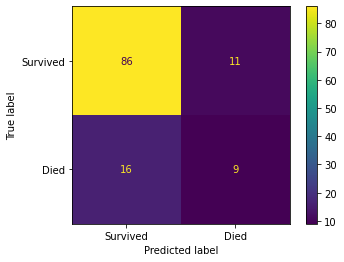

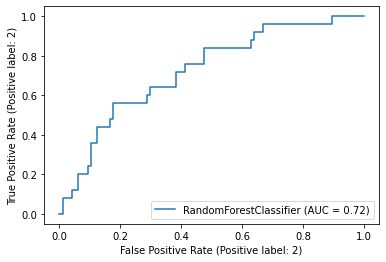

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.5263157894736842
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.8333333333333334

Average Accuracy is: 0.706140350877193

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 80}


In [33]:
predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 100, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: none
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.75      0.97      0.85        78
           2       0.60      0.11      0.18        28

    accuracy                           0.75       106
   macro avg       0.68      0.54      0.52       106
weighted avg       0.71      0.75      0.67       106



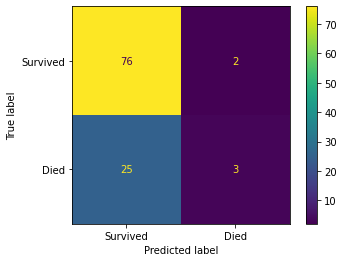

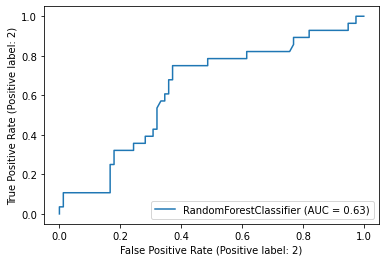

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [34]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 60, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: standardization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.74      0.95      0.83        78
           2       0.33      0.07      0.12        28

    accuracy                           0.72       106
   macro avg       0.54      0.51      0.47       106
weighted avg       0.63      0.72      0.64       106



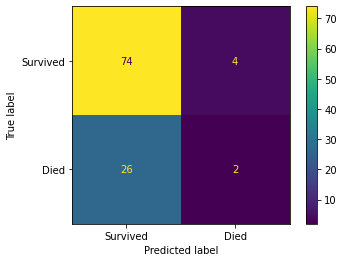

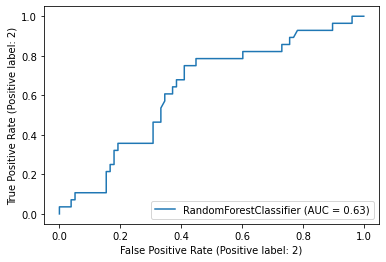

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 60}


In [35]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'standardization', 'RF', True)

Parameters: criterion: entropy, max_depth: 5, max_features: auto, n_estimators: 100, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: normalization
Algorithm: Random Forest

              precision    recall  f1-score   support

           1       0.75      0.97      0.85        78
           2       0.60      0.11      0.18        28

    accuracy                           0.75       106
   macro avg       0.68      0.54      0.52       106
weighted avg       0.71      0.75      0.67       106



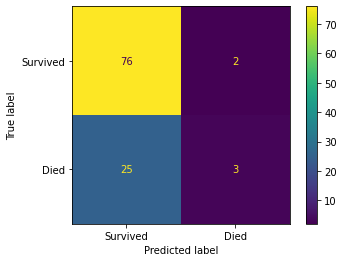

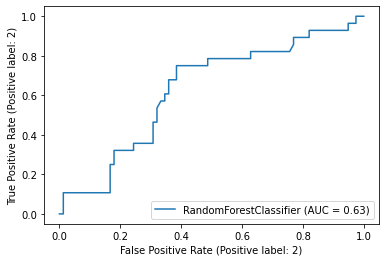

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.7920833333333334

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [36]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'RF', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data
Scaler: none
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.82      0.92      0.86        97
           2       0.38      0.20      0.26        25

    accuracy                           0.77       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.73      0.77      0.74       122



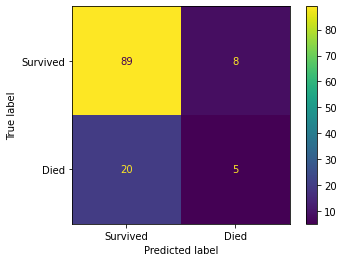

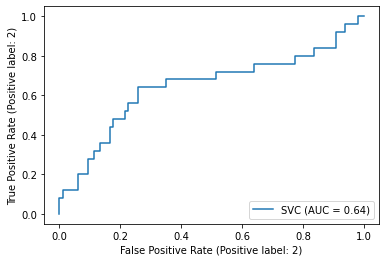

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [37]:
predictionResults(data, 'data', '', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data
Scaler: standardization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.82      0.92      0.86        97
           2       0.38      0.20      0.26        25

    accuracy                           0.77       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.73      0.77      0.74       122



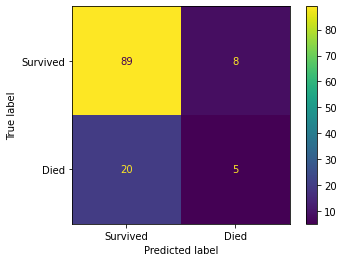

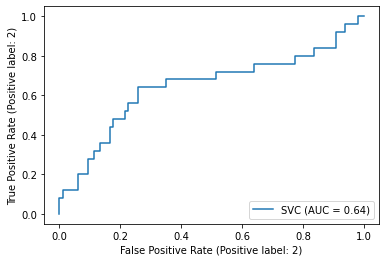

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [38]:
predictionResults(data, 'data', 'standardization', 'SV', True)

Parameters: C: 10, gamma: 1, kernel: linear, random_state: 0
Data set: data
Scaler: normalization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.82      0.92      0.86        97
           2       0.38      0.20      0.26        25

    accuracy                           0.77       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.73      0.77      0.74       122



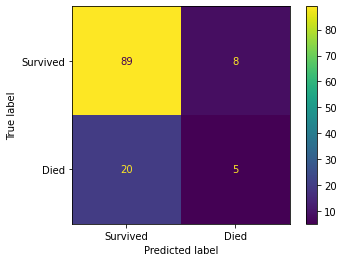

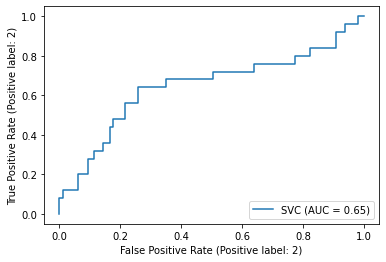

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7383040935672515

{'C': 10, 'kernel': 'linear', 'random_state': 0}


In [39]:
predictionResults(data, 'data', 'normalization', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_outliers
Scaler: none
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


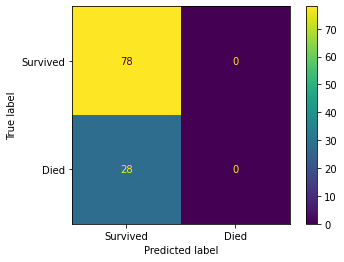

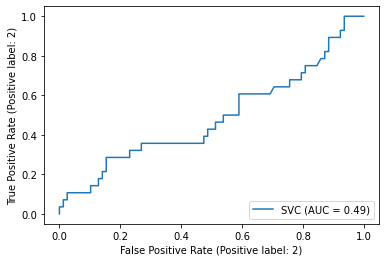

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [40]:
predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_outliers
Scaler: standardization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


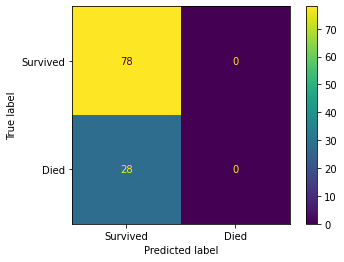

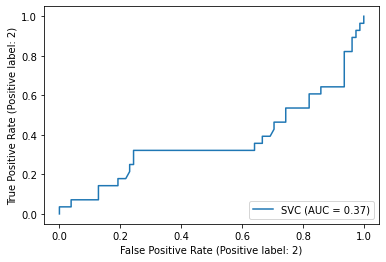

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [41]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'standardization', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_outliers
Scaler: normalization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


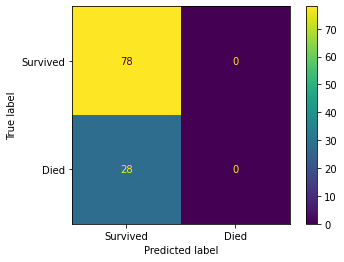

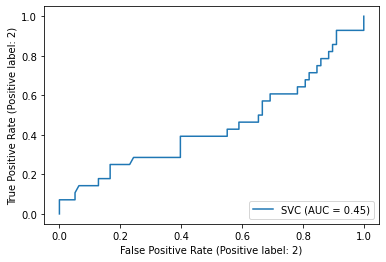

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [42]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_skew
Scaler: none
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



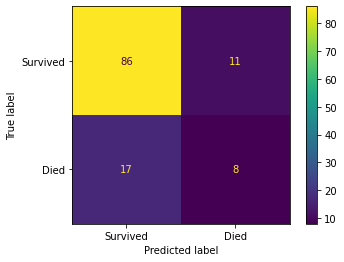

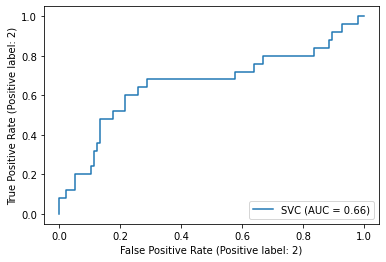

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.737719298245614

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [43]:
predictionResults(data_removed_skew, 'data_removed_skew', '', 'SV', True)

Parameters: C: 10, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_skew
Scaler: standardization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



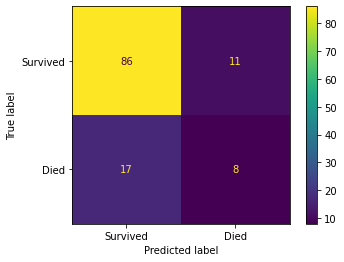

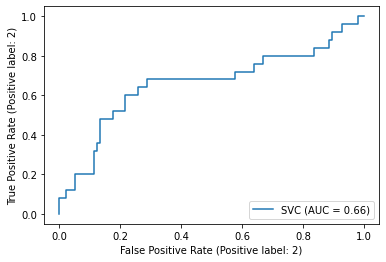

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7432748538011695

{'C': 10, 'kernel': 'linear', 'random_state': 0}


In [44]:
predictionResults(data_removed_skew, 'data_removed_skew', 'standardization', 'SV', True)

Parameters: C: 10, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_skew
Scaler: normalization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



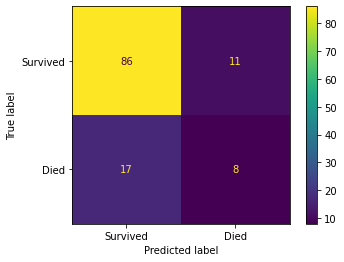

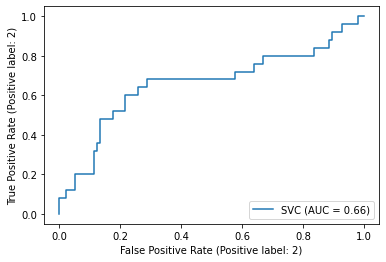

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7432748538011695

{'C': 10, 'kernel': 'linear', 'random_state': 0}


In [45]:
predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: rbf, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: none
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.72      0.91      0.80        78
           2       0.00      0.00      0.00        28

    accuracy                           0.67       106
   macro avg       0.36      0.46      0.40       106
weighted avg       0.53      0.67      0.59       106



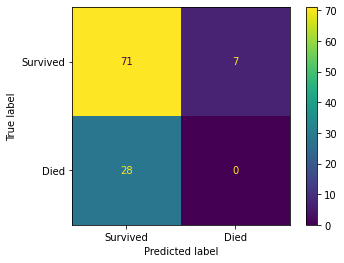

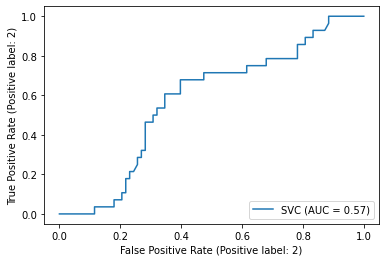

Accuracy for iteration 1 is 0.875
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.75
Accuracy for iteration 10 is 0.8666666666666667

Average Accuracy is: 0.8179166666666666

{'C': 1, 'kernel': 'rbf', 'random_state': 0}


In [46]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: standardization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


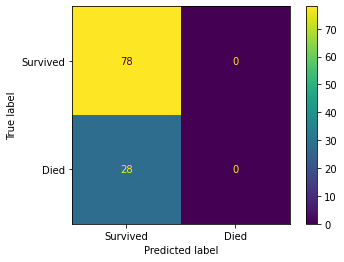

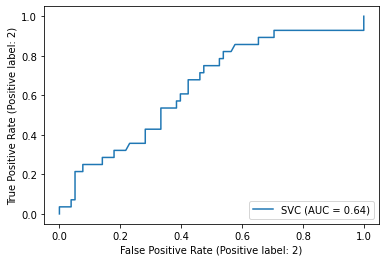

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [47]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'standardization', 'SV', True)

Parameters: C: 1, gamma: 1, kernel: linear, random_state: 0
Data set: data_removed_outliers_and_skew
Scaler: normalization
Algorithm: Support Vector Machine

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


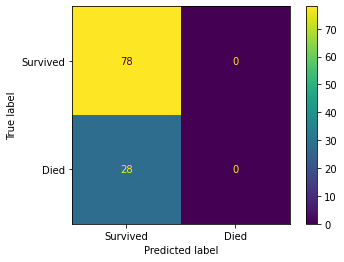

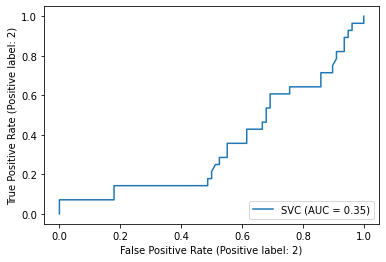

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'C': 1, 'kernel': 'linear', 'random_state': 0}


In [48]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'SV', True)

Parameters: activation: logistic, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data
Scaler: none
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.86      0.84      0.85        97
           2       0.43      0.48      0.45        25

    accuracy                           0.76       122
   macro avg       0.65      0.66      0.65       122
weighted avg       0.77      0.76      0.77       122



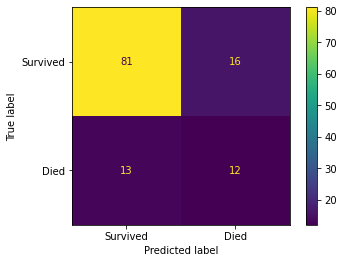

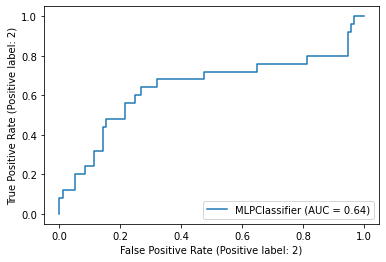

Accuracy for iteration 1 is 0.7368421052631579
Accuracy for iteration 2 is 0.7368421052631579
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7271929824561403



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the nu

{'activation': 'logistic', 'alpha': 0.0001, 'solver': 'adam'}


In [49]:
predictionResults(data, 'data', '', 'NN', True)

Parameters: activation: tanh, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: sgd
Data set: data
Scaler: standardization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.83      0.90      0.86        97
           2       0.41      0.28      0.33        25

    accuracy                           0.77       122
   macro avg       0.62      0.59      0.60       122
weighted avg       0.74      0.77      0.75       122



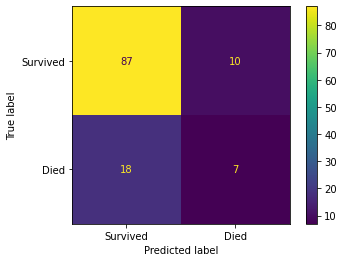

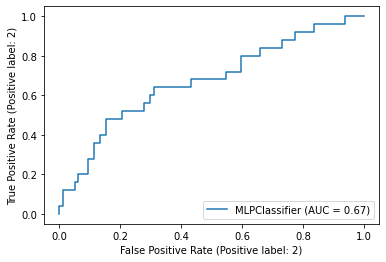

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7605263157894737

{'activation': 'tanh', 'alpha': 0.0001, 'solver': 'sgd'}


In [50]:
predictionResults(data, 'data', 'standardization', 'NN', True)

Parameters: activation: relu, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: lbfgs
Data set: data
Scaler: normalization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.82      0.92      0.87        97
           2       0.43      0.24      0.31        25

    accuracy                           0.78       122
   macro avg       0.63      0.58      0.59       122
weighted avg       0.74      0.78      0.75       122



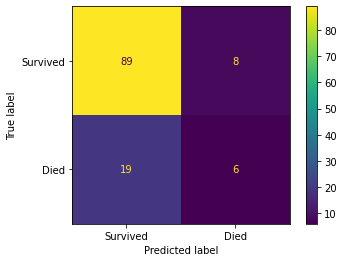

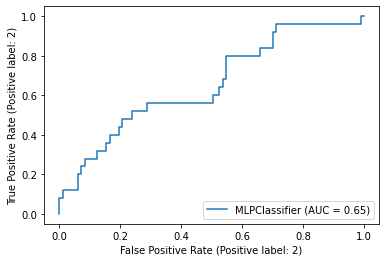

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.5789473684210527
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7385964912280701

{'activation': 'relu', 'alpha': 0.0001, 'solver': 'lbfgs'}


In [51]:
predictionResults(data, 'data', 'normalization', 'NN', True)

Parameters: activation: logistic, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_outliers
Scaler: none
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


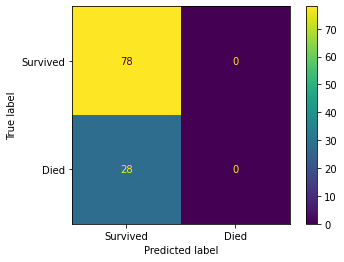

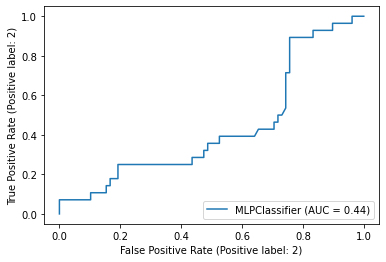

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'activation': 'logistic', 'alpha': 0.0001, 'solver': 'adam'}


In [52]:
predictionResults(data_removed_outliers, 'data_removed_outliers', '', 'NN', True)

Parameters: activation: logistic, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_outliers
Scaler: standardization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


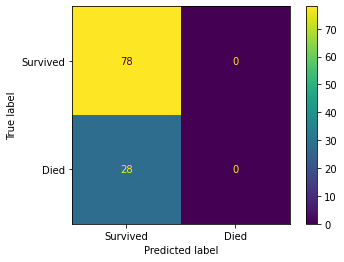

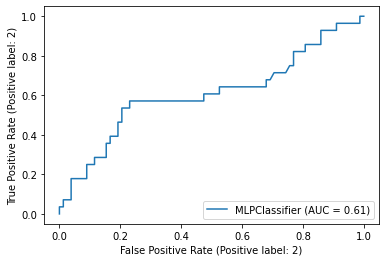

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'activation': 'logistic', 'alpha': 0.0001, 'solver': 'adam'}


In [53]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'standardization', 'NN', True)

Parameters: activation: relu, alpha: 0.01, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: lbfgs
Data set: data_removed_outliers
Scaler: normalization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.76      0.97      0.85        78
           2       0.67      0.14      0.24        28

    accuracy                           0.75       106
   macro avg       0.71      0.56      0.54       106
weighted avg       0.74      0.75      0.69       106



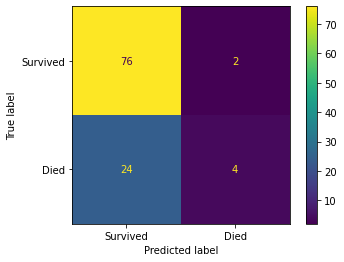

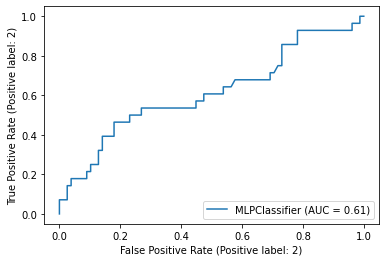

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.8

Average Accuracy is: 0.805

{'activation': 'relu', 'alpha': 0.01, 'solver': 'lbfgs'}


In [54]:
predictionResults(data_removed_outliers, 'data_removed_outliers', 'normalization', 'NN', True)

Parameters: activation: identity, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_skew
Scaler: none
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.84      0.89      0.86        97
           2       0.45      0.36      0.40        25

    accuracy                           0.78       122
   macro avg       0.65      0.62      0.63       122
weighted avg       0.76      0.78      0.77       122



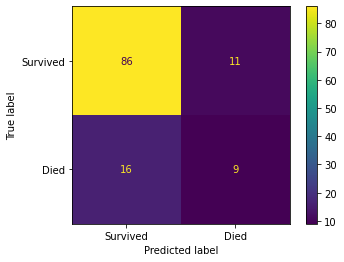

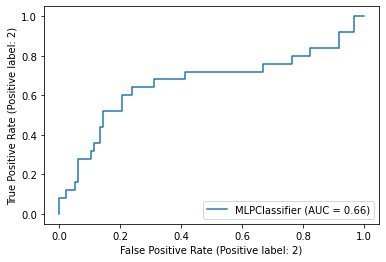

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7543859649122807

{'activation': 'identity', 'alpha': 0.0001, 'solver': 'adam'}


In [55]:
predictionResults(data_removed_skew, 'data_removed_skew', '', 'NN', True)

Parameters: activation: identity, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: sgd
Data set: data_removed_skew
Scaler: standardization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



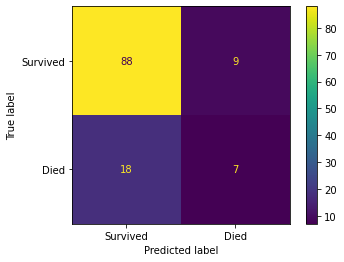

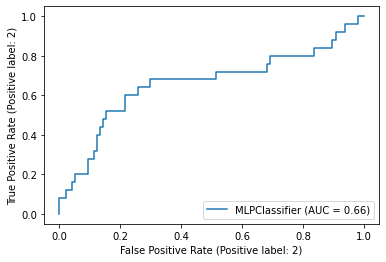

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7488304093567252

{'activation': 'identity', 'alpha': 0.0001, 'solver': 'sgd'}


In [56]:
predictionResults(data_removed_skew, 'data_removed_skew', 'standardization', 'NN', True)

Parameters: activation: relu, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_skew
Scaler: normalization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           2       0.39      0.28      0.33        25

    accuracy                           0.76       122
   macro avg       0.61      0.58      0.59       122
weighted avg       0.74      0.76      0.75       122



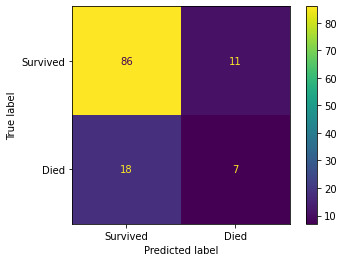

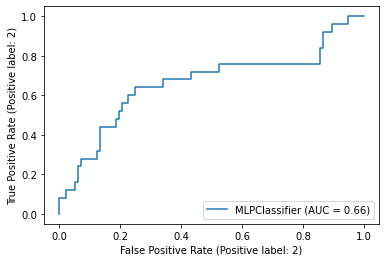

Accuracy for iteration 1 is 0.7368421052631579
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Average Accuracy is: 0.7546783625730994

{'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}


In [57]:
predictionResults(data_removed_skew, 'data_removed_skew', 'normalization', 'NN', True)

Parameters: activation: identity, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_outliers_and_skew
Scaler: none
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.74      0.96      0.84        78
           2       0.40      0.07      0.12        28

    accuracy                           0.73       106
   macro avg       0.57      0.52      0.48       106
weighted avg       0.65      0.73      0.65       106



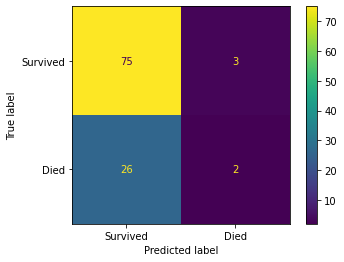

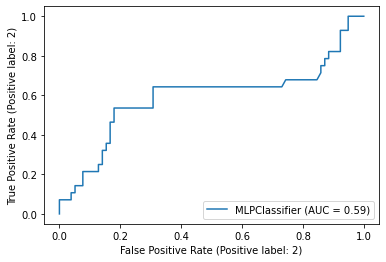

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.6875
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.8

Average Accuracy is: 0.81125

{'activation': 'identity', 'alpha': 0.0001, 'solver': 'adam'}


In [58]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', '', 'NN', True)

Parameters: activation: tanh, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: sgd
Data set: data_removed_outliers_and_skew
Scaler: standardization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.75      0.96      0.84        78
           2       0.50      0.11      0.18        28

    accuracy                           0.74       106
   macro avg       0.62      0.53      0.51       106
weighted avg       0.68      0.74      0.67       106



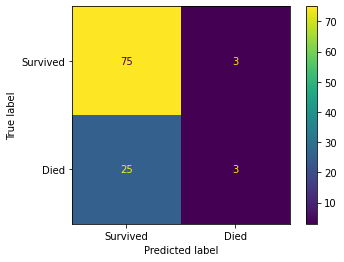

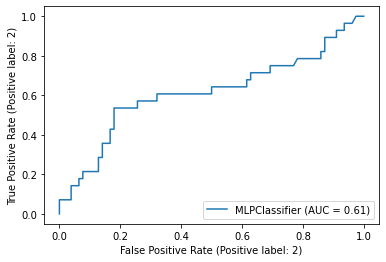

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.8

Average Accuracy is: 0.81125

{'activation': 'tanh', 'alpha': 0.0001, 'solver': 'sgd'}


In [59]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'standardization', 'NN', True)

Parameters: activation: logistic, alpha: 0.0001, hidden_layer_sizes: (5,), learning_rate_init: 0.01, max_iter: 10000, random_state: 1, solver: adam
Data set: data_removed_outliers_and_skew
Scaler: normalization
Algorithm: Neural Network

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


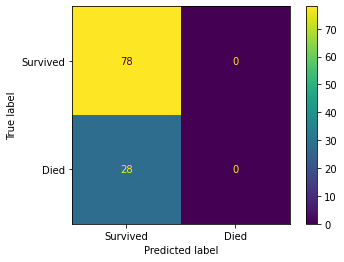

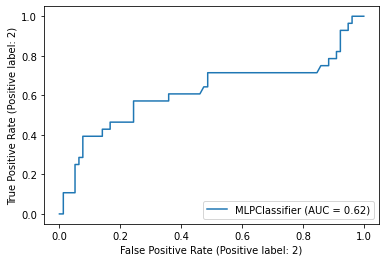

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333

Average Accuracy is: 0.8108333333333333

{'activation': 'logistic', 'alpha': 0.0001, 'solver': 'adam'}


In [60]:
predictionResults(data_removed_outliers_and_skew, 'data_removed_outliers_and_skew', 'normalization', 'NN', True)